# Week 10 - Regression and Modelling in R

## Recap/Precap  
Sample statistics: use to help us compute parameter estimates of models  
Probability: helps formalise the model problem to deal with noisy data  
Expectation: defines average values a model takes on.  
Distributions: define the random processes in a model.  
Inference: helps to estimate parameters of a model.  
CLT: implies the variance of our parameter estimates will shrink with more observations.  
Confidence Intervals: give bounds on the value of the true parameters of the model.  
Hypothesis testing: helps tell us if model components are useful for prediction, and to compare models.  
Regression: Predict a continuous target variable conditional on other continuous and categorical variables.  

## Underfitting/Overfitting
We often have many measured predictors  
- In our blood pressure example, we have weight, body surface area, age, pulse rate and a measure of stress  
- Which ones to include?  
- The R2 always improves as we include more predictors  
    - so model always fits the data we have better  
- But prediction on new, unseen data might be worse  
- We call this generalisation  

Omitting important predictors:  
- Underfitting
    - Leads to systematic error, bias in predicting the target
    - High bias

Including spurious predictors:
- Overfitting
    - Model learns noise and random variation
    - Poorer ability to predict new, unseen data
    - High variance

## Model Selection
Estimate the associated linear regression coefficients using least-squares/maximum likelihood
Select a model by minimising an information criterion:
$L(y | ˆβ, ˆσ^2_ML, M) + α(n, kM)$

This is a form of penalized likelihood estimation:
- A model is penalized by its complexity (ability to fit data)

Akaike Information Criterion (AIC)  
α(n, kM) = kM  
Bayesian Information Criterion (BIC)  
α(n, kM) = kM/2 log n
- AIC penalty smaller than BIC; increased chance of overfitting
- BIC penalty bigger than AIC; increased chance of underfitting
- Differences in scores of ≥ 3 or more are considered significant
- both AIC() and BIC() supported in R

Selection method:  
- Naive forward  
- Naive backward  
- Stepwise

## Cross Validation  
Split datset into training and test datasets at random  
Evaluate error on each split
K-fold cross validation - partition data into K equal sized, disjoint subsets

In [12]:
rm(list = ls())
wine <- read.csv("data/wine_train.csv")

# summary(wine)
# str(wine)
# head(wine)

fit <- lm(quality ~ 1, wine)
# summary(fit)

wine_full <- lm(quality ~ ., wine)
summary(wine_full)



Call:
lm(formula = quality ~ ., data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02506 -0.44003  0.00278  0.43634  2.15036 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           1.904e+02  1.377e+02   1.383   0.1701  
fixed.acidity         1.413e-01  1.555e-01   0.909   0.3660  
volatile.acidity     -1.328e+00  7.564e-01  -1.755   0.0827 .
citric.acid          -6.764e-01  7.878e-01  -0.859   0.3929  
residual.sugar        1.074e-01  5.455e-02   1.969   0.0521 .
chlorides            -3.548e+00  8.601e+00  -0.413   0.6809  
free.sulfur.dioxide   1.115e-02  6.364e-03   1.753   0.0831 .
total.sulfur.dioxide  6.880e-05  2.734e-03   0.025   0.9800  
density              -1.903e+02  1.399e+02  -1.360   0.1771  
pH                    3.495e-01  7.024e-01   0.498   0.6201  
sulphates             2.389e-02  6.855e-01   0.035   0.9723  
alcohol               2.099e-01  1.658e-01   1.266   0.2089  
---
Signif. codes:  0 '***' 0

Subset selection object
Call: regsubsets.formula(quality ~ ., wine, nvmax = ncol(wine), method = "exhaustive")
11 Variables  (and intercept)
                     Forced in Forced out
fixed.acidity            FALSE      FALSE
volatile.acidity         FALSE      FALSE
citric.acid              FALSE      FALSE
residual.sugar           FALSE      FALSE
chlorides                FALSE      FALSE
free.sulfur.dioxide      FALSE      FALSE
total.sulfur.dioxide     FALSE      FALSE
density                  FALSE      FALSE
pH                       FALSE      FALSE
sulphates                FALSE      FALSE
alcohol                  FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: exhaustive
          fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1  ( 1 )  " "           " "              " "         " "            " "      
2  ( 1 )  " "           " "              " "         " "            " "      
3  ( 1 )  " "           " "              " "         "*" 

[1] 3

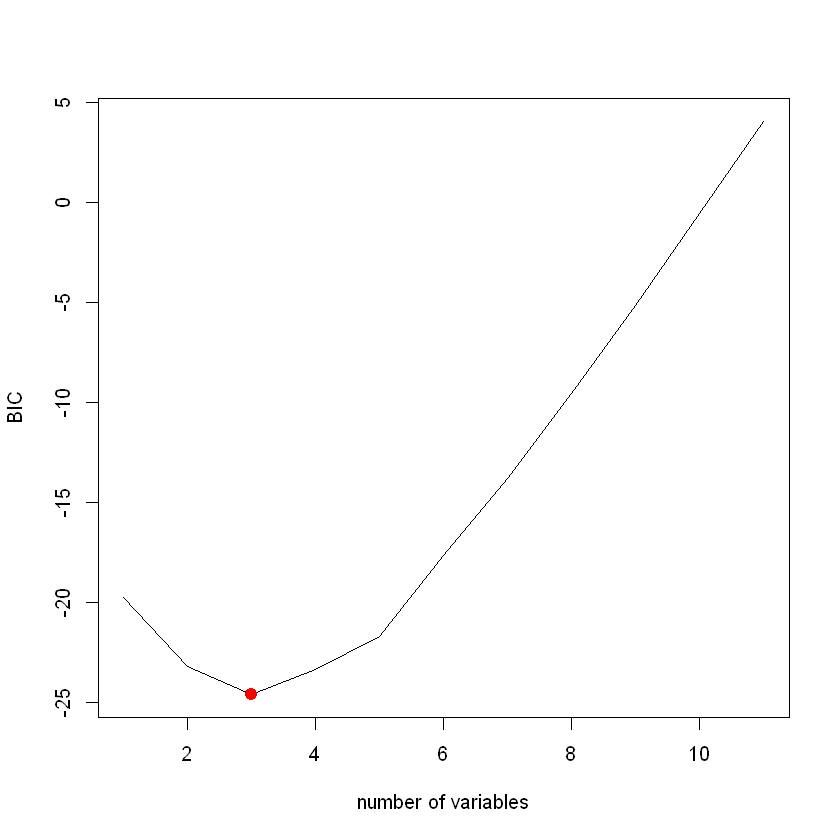

[1] 5

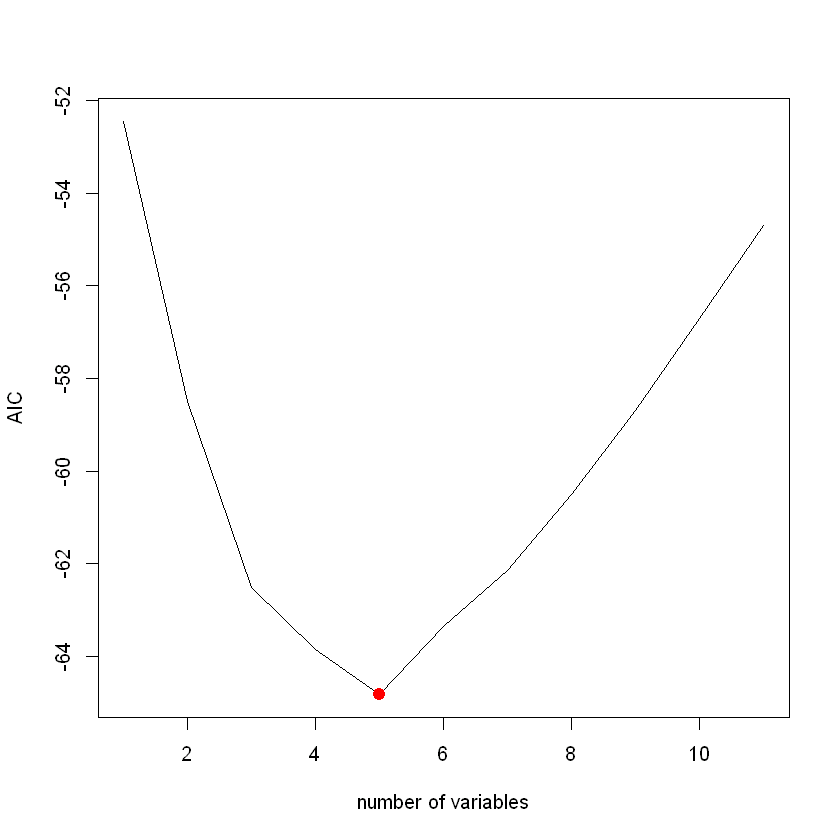

In [20]:
library(leaps)
# help(regsubsets)

regfit.winefull <- regsubsets(quality ~ ., wine, nvmax=ncol(wine), method='exhaustive')
reg.summary <- summary(regfit.winefull)
reg.summary

# BIC
plot(reg.summary$bic, xlab = 'number of variables', ylab = 'BIC', type = 'l')
minbic <- which.min(reg.summary$bic)
points(minbic, reg.summary$bic[minbic], col='red', cex = 2, pch = 20)
minbic

# AIC
n <- nrow(wine)
aic_values <- numeric(11)
for (i in 1:11){
    rss <- reg.summary$rss[i]
    k <- i + 1
    aic_values[i] <- n * log(rss / n) + 2 * k
}

plot(1:11, aic_values, xlab = 'number of variables', ylab = 'AIC', type = 'l')
minaic <- which.min(aic_values)
points(minaic, aic_values[minaic], col = 'red', cex = 2, pch = 20)
minaic

In [21]:
#STEPWISE
back.fit <- step(wine_full, trace = 1, k = 2, direction = "backward")
summary(back.fit)



Start:  AIC=-54.7
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- total.sulfur.dioxide  1   0.00033 45.523 -56.695
- sulphates             1   0.00063 45.523 -56.695
- chlorides             1   0.08804 45.611 -56.503
- pH                    1   0.12805 45.651 -56.415
- citric.acid           1   0.38138 45.904 -55.862
- fixed.acidity         1   0.42716 45.950 -55.762
- alcohol               1   0.82908 46.352 -54.891
<none>                              45.523 -54.696
- density               1   0.95750 46.480 -54.615
- free.sulfur.dioxide   1   1.58899 47.112 -53.265
- volatile.acidity      1   1.59394 47.117 -53.255
- residual.sugar        1   2.00481 47.527 -52.386

Step:  AIC=-56.7
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + density


Call:
lm(formula = quality ~ volatile.acidity + residual.sugar + free.sulfur.dioxide + 
    density + alcohol, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99401 -0.47107 -0.02954  0.42458  2.20723 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          1.276e+02  7.533e+01   1.693  0.09369 . 
volatile.acidity    -1.348e+00  7.083e-01  -1.902  0.06017 . 
residual.sugar       8.572e-02  2.951e-02   2.905  0.00458 **
free.sulfur.dioxide  1.151e-02  4.837e-03   2.379  0.01938 * 
density             -1.261e+02  7.490e+01  -1.684  0.09556 . 
alcohol              2.985e-01  1.118e-01   2.671  0.00891 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7024 on 94 degrees of freedom
Multiple R-squared:  0.3894,	Adjusted R-squared:  0.3569 
F-statistic: 11.99 on 5 and 94 DF,  p-value: 5.478e-09
